# _Sentimental Analysis of IMDb Movies Review_

#### Step:1 : Import the pandas 

In [1]:
import pandas as pd

#### Step:2 : Mount the CSV File to VsCode

In [2]:
data_frame = pd.read_csv(r"C:\Users\apgan\OneDrive\Documents\GitHub\IBM Projects\IMDB Dataset.csv")

### Step:3: Read the Dataset

In [3]:
data_frame.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [19]:
data_frame.sample(10)

,review,sentiment
22135,"All internet buzz aside, this movie was god aw...",negative
1389,I'm surprised that no one yet has mentioned th...,positive
7049,"Okay, first the good thing : If you saw the tr...",negative
45513,I don't know why people except a lot from low ...,positive
46798,This film is wonderful in every way that moder...,positive
24875,This is a very dull film with poorly developed...,negative
11207,Bellocchio refers to this as a mainly politica...,positive
48769,I loved watching ''Sea Hunt '' back in the day...,positive
35676,I can't believe this movie has an average rati...,negative
3399,"""When a Killer Calls"" is an unusually nasty sl...",negative


In [6]:
data_frame.columns

Index(['review', 'sentiment'], dtype='object')

In [7]:
data_frame.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
data_frame.shape

(50000, 2)

In [20]:
data_frame.duplicated().sum()

0

In [9]:
data_frame.drop_duplicates(inplace=True)
data_frame.shape

(49582, 2)

In [21]:
data = data_frame.drop_duplicates(subset=['review']).reset_index(drop=True)

In [22]:
data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

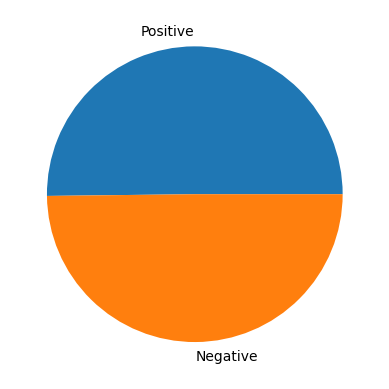

In [24]:
data_dist = [
    len(data[data['sentiment']=='positive']),
    len(data[data['sentiment']=='negative'])
]
labels = ['Positive','Negative']
plt.pie(data_dist, labels = labels)
plt.show

# Data Preprocessing

In [25]:
import re

## Removing HTML Tags

In [26]:
def removeHTML(text):
    text = re.sub(r'<[^>]*>', '', text)
    return(text)

### Import NLTK

In [37]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Removing Stop Words

In [38]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [39]:
def removeStopWords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return(text)

### Text Lemmatizing

In [40]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\apgan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
def Lemmatizing(text):
    text = lemmatizer.lemmatize(text)
    return(text)

### Removing Noise

In [42]:
def removeNoise(text):
    text = re.sub(r'[^a-zA-Z\s]+', '', text) # Only keep English letters
    text = re.sub(r'(\w)\1{2,}', r'\1', text)   #Normalize Repeated Letters
    text = re.sub(r'\s{2,}', ' ', text).strip() # Removing extra spaces
    return(text)

# Adding New Column for the Cleaned Text

In [45]:
CleanedText = []

In [46]:
for i in range(len(data)):
    text = data.review[i]
    text = removeHTML(text)
    text = removeStopWords(text)
    text = Lemmatizing(text)
    text = removeNoise(text)
    CleanedText.append(text)

In [47]:
data['CleanedText'] = CleanedText

In [48]:
data.head()

,review,sentiment,CleanedText
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [49]:
data.sample(20)

,review,sentiment,CleanedText
48481,"I normally don't comment on movies on IMDB, bu...",positive,normally comment movies imdb case feel like sh...
28033,One of the best love stories I have ever seen....,positive,one best love stories ever seen bit like watch...
32634,This film is one of the best of 1986 with cree...,positive,film one best creepy yet intriguing performanc...
39891,It is a shame that a movie with such a good ci...,negative,shame movie good cinematography one plot suppo...
28341,There is something that one of the characters ...,positive,something one characters the aging film direct...
28311,Lets be realistic here. This is one of the wor...,negative,lets realistic here one worst shows ever seen ...
6786,I guess this is in the public domain as its ou...,negative,guess public domain dvd first off feel good pr...
24103,The Booth puts a whole new twist on your typic...,positive,booth puts whole new twist typical jhorror mov...
7546,this movie has lot of downsides and thats all ...,negative,movie lot downsides thats could see painfully ...
15948,I question anyone saying they don't care for t...,positive,question anyone saying care movie reviewers sa...


# Splitting Data into Training and Testing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

# Feature Extraction using TF-IDF Vectorizer

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['CleanedText'])
X_test = vectorizer.transform(test['CleanedText'])

In [54]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

# Model building and Evaluation

### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
rf.fit(X_train, train['sentiment'])

RandomForestClassifier(n_jobs=-1, random_state=0)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [59]:
pred_y_rf = rf.predict(X_test)

In [60]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_rf))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_rf))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_rf, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4909
    positive       0.86      0.85      0.85      5008

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

____________________________________________________________________________________________________
Accuracy: 0.8504588081072905
____________________________________________________________________________________________________
F1 Score: 0.8504625335452527


### Multinominal Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [70]:
mnb.fit(X_train, train['sentiment'])

MultinomialNB()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
__On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.__

In [71]:
pred_y_mnb = mnb.predict(X_test)
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_mnb))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_mnb))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_mnb, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4909
    positive       0.87      0.85      0.86      5008

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

____________________________________________________________________________________________________
Accuracy: 0.8557023293334678
____________________________________________________________________________________________________
F1 Score: 0.8556984235435277


# Testing the Model

In [72]:
import numpy as np

In [73]:
def test_classifier(clf,input_text):
    input_text = removeHTML(input_text)
    input_text = removeStopWords(input_text)
    input_text = Lemmatizing(input_text)
    input_text = removeNoise(input_text)
    text_2_vec = vectorizer.transform(np.array([input_text]))    

    pred_y = clf.predict(text_2_vec)

    if pred_y == 'positive':
        return ('Positive.')
    else:
        return ('Negative.')

In [74]:
input_text = '''Lacking coherence and depth, the 2015 "Fantastic Four" adaptation falters with weak
                characterization and a disjointed plot, failing to capture the essence of its source material.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: "Lacking coherence and depth, the 2015 "Fantastic Four" adaptation falters with weak
                characterization and a disjointed plot, failing to capture the essence of its source material.".
Sentiment: Negative.


In [75]:
input_text = '''A groundbreaking blend of stunning visuals and thrilling storytelling,
                "Jurassic Park" remains a timeless adventure that defined the blockbuster experience.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: "A groundbreaking blend of stunning visuals and thrilling storytelling,
                "Jurassic Park" remains a timeless adventure that defined the blockbuster experience.".
Sentiment: Positive.


In [76]:
input_text = '''An intense, gripping saga showcasing Heath Ledgers mesmerizing performance
                as the Joker. "The Dark Knight" stands as a triumph in the superhero genre, blending action with profound storytelling.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(rf,input_text))

Text: "An intense, gripping saga showcasing Heath Ledgers mesmerizing performance
                as the Joker. "The Dark Knight" stands as a triumph in the superhero genre, blending action with profound storytelling.".
Sentiment: Positive.


In [77]:
input_text = '''A disjointed mess with flashes of potential. "Suicide Squad" suffers from an uneven plot, 
                underdeveloped characters, and tonal inconsistencies that undermine its promising premise.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(rf,input_text))

Text: "A disjointed mess with flashes of potential. "Suicide Squad" suffers from an uneven plot, 
                underdeveloped characters, and tonal inconsistencies that undermine its promising premise.".
Sentiment: Negative.


In [78]:
input_text = '''Revolutionary in both visuals and narrative, "The Matrix" is a mind-bending sci-fi classic
                that redefined action cinema, setting new standards for storytelling and special effects.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(rf,input_text))

Text: "Revolutionary in both visuals and narrative, "The Matrix" is a mind-bending sci-fi classic
                that redefined action cinema, setting new standards for storytelling and special effects.".
Sentiment: Positive.


In [79]:
input_text = '''"Whiplash" is a tour de force that resonates deeply. Its intense narrative, fueled by stellar performances and
                an electrifying soundtrack, makes it an unforgettable cinematic experience.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: ""Whiplash" is a tour de force that resonates deeply. Its intense narrative, fueled by stellar performances and
                an electrifying soundtrack, makes it an unforgettable cinematic experience.".
Sentiment: Positive.


In [80]:
input_text = '''"M. Night Shyamalan's "The Happening" is a misfire, featuring a disjointed plot 
                and cringe-inducing dialogue. Despite a promising premise, it falls flat, lacking both suspense and coherence.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: ""M. Night Shyamalan's "The Happening" is a misfire, featuring a disjointed plot 
                and cringe-inducing dialogue. Despite a promising premise, it falls flat, lacking both suspense and coherence.".
Sentiment: Negative.
